In [3]:
import os
import pandas as pd
import numpy as np
import bisect
import pickle
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Preprocessing
- Resize images to 64x64
- Convert to grayscale
- Normalize to range [0, 1]
- Save pixels to numpy array
- Labels: {0: tops, 1: bottoms, 2: bags, 3: shoes, 4: others}

In [4]:
data_paths = [os.path.join("dataset","train"), os.path.join("dataset", "test")]
categories = ["tops", "bottoms", "bags", "shoes", "others"]
r1, r2 = 64, 64

X_data_train = []
y_data_train = []

X_data_test = []
y_data_test = []

for data_path in data_paths:
    for i, category in enumerate(categories):
        cat_path = os.path.join(data_path, category)
        for filename in os.listdir(cat_path):
            img_path = os.path.join(cat_path, filename)

            try:
                img = Image.open(img_path)
            except Exception as e:
                print(f"Error processing image '{img_path}': {e}")
                continue

            # Resize images
            img = img.resize((r1, r2)) 

            # Convert to black and white
            img = img.convert("L")

            # Normalize pixel values (0 to 1)
            img = np.array(img) / 255.0

            if "train" in data_path:
                # Flatten image and add to X_data
                X_data_train.append(img.flatten())
                # Add corresponding label to y_data
                y_data_train.append(i)

            elif "test" in data_path:
                X_data_test.append(img.flatten())
                y_data_test.append(i)

# Convert lists to np arrays
X_train = np.array(X_data_train)
y_train = np.array(y_data_train)

X_test = np.array(X_data_test)
y_test = np.array(y_data_test)

Error processing image 'dataset\train\bags\bag_0021': cannot identify image file 'dataset\\train\\bags\\bag_0021'
Error processing image 'dataset\train\bags\bag_0161': cannot identify image file 'dataset\\train\\bags\\bag_0161'
Error processing image 'dataset\train\bags\bag_0164': cannot identify image file 'dataset\\train\\bags\\bag_0164'
Error processing image 'dataset\train\bags\bag_0259': cannot identify image file 'dataset\\train\\bags\\bag_0259'
Error processing image 'dataset\train\bags\bag_0281': cannot identify image file 'dataset\\train\\bags\\bag_0281'
Error processing image 'dataset\train\others\other_0007': cannot identify image file 'dataset\\train\\others\\other_0007'
Error processing image 'dataset\train\others\other_0065': cannot identify image file 'dataset\\train\\others\\other_0065'


# PCA

In [5]:
# PCA - exploring how many features to keep
pca_explore = PCA(random_state=1)
pca_explore.fit_transform(X_train)

array([[-3.48200406e+00,  8.04567809e+00, -3.74317092e-01, ...,
        -9.10218522e-04, -2.87504721e-03, -1.13206339e-03],
       [-1.08255461e+01,  4.14840135e+00,  5.34411497e-01, ...,
        -2.28426110e-03,  3.60898409e-03, -1.89292472e-03],
       [-1.17298902e+01,  4.05461449e+00,  1.04351244e+01, ...,
         2.77971582e-03, -3.48498502e-03, -9.56570418e-04],
       ...,
       [-3.16722082e+00, -7.87354319e+00,  2.91752315e+00, ...,
         2.14878846e-04, -2.32859850e-03, -9.40163377e-04],
       [ 1.45484147e+00, -6.03080248e+00,  2.54592430e+00, ...,
         1.83181836e-03, -2.32349299e-04, -1.55766968e-03],
       [-1.28709210e+00, -7.52373550e+00,  2.40153847e+00, ...,
         2.62991740e-03, -1.67604738e-03,  4.48197606e-03]])

In [6]:
PCA_THRESHOLD = 0.9
pca_cumulative_variances = np.cumsum(pca_explore.explained_variance_ratio_)

# bisect_left(array, value) returns the smallest idx such that array[idx] > value
# i.e. pca_cumulative_variances[pca_num_components] > PCA_THRESHOLD
pca_num_components = bisect.bisect_left(pca_cumulative_variances, PCA_THRESHOLD)

pca_num_components

100

In [7]:
# PCA - using the minimum number of components that are responsible for (PCA_THRESHOLD) amount of variance

pca = PCA(n_components=pca_num_components)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

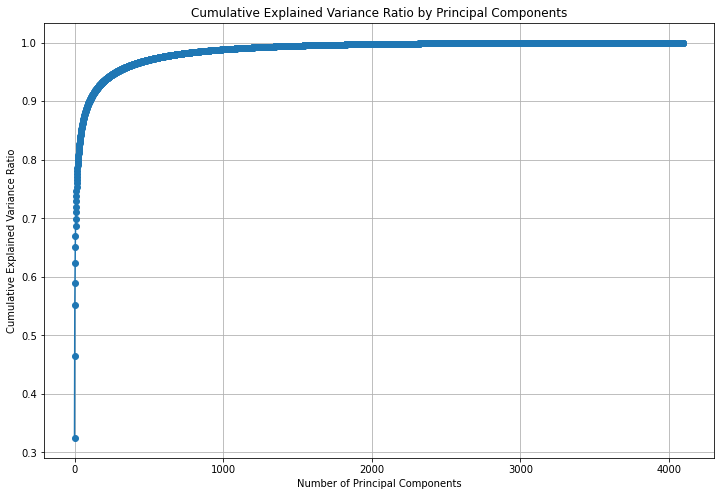

In [8]:
plt.figure(figsize=(12, 8), facecolor="white")
plt.plot(np.cumsum(pca_explore.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Save Data

In [9]:
# Save as dataframes

train_df = pd.DataFrame(data=X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
train_df['label'] = y_train

test_df = pd.DataFrame(data=X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])
test_df['label'] = y_test

train_pca_df = pd.DataFrame(data=X_train_PCA, columns=[f"pixel_{i}" for i in range(X_train_PCA.shape[1])])
train_pca_df['label'] = y_train

test_pca_df = pd.DataFrame(data=X_test_PCA, columns=[f"pixel_{i}" for i in range(X_test_PCA.shape[1])])
test_pca_df['label'] = y_test

with open("preprocessed_data/train_df.pkl", "wb") as f:
    pickle.dump(train_df, f)

with open("preprocessed_data/test_df.pkl", "wb") as f:
    pickle.dump(test_df, f)

with open("preprocessed_data/train_pca_df.pkl", "wb") as f:
    pickle.dump(train_pca_df, f)

with open("preprocessed_data/test_pca_df.pkl", "wb") as f:
    pickle.dump(test_pca_df, f)

# Viewing Data

Viewing as Dataframe

In [16]:
train_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label
0,0.643137,0.639216,0.639216,0.639216,0.639216,0.635294,0.643137,0.647059,0.654902,0.654902,...,0.654902,0.643137,0.627451,0.619608,0.611765,0.603922,0.600000,0.596078,0.588235,0
1,0.823529,0.819608,0.815686,0.815686,0.815686,0.811765,0.815686,0.815686,0.819608,0.819608,...,0.749020,0.745098,0.749020,0.756863,0.760784,0.764706,0.776471,0.788235,0.800000,0
2,0.996078,0.996078,0.992157,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.572549,0.568627,0.564706,0.576471,0.576471,0.576471,0.576471,0.576471,0.576471,0.584314,...,0.717647,0.705882,0.690196,0.682353,0.678431,0.690196,0.690196,0.690196,0.686275,0
4,0.666667,0.666667,0.666667,0.666667,0.662745,0.662745,0.686275,0.705882,0.705882,0.701961,...,0.831373,0.823529,0.819608,0.819608,0.819608,0.800000,0.800000,0.811765,0.811765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,0.435294,0.447059,0.474510,0.474510,0.458824,0.447059,0.423529,0.443137,0.435294,0.431373,...,0.235294,0.223529,0.211765,0.200000,0.188235,0.184314,0.172549,0.160784,0.160784,4
9743,0.341176,0.345098,0.345098,0.388235,0.427451,0.466667,0.482353,0.529412,0.541176,0.549020,...,0.509804,0.521569,0.549020,0.517647,0.513725,0.498039,0.509804,0.509804,0.505882,4
9744,0.462745,0.462745,0.458824,0.462745,0.462745,0.474510,0.478431,0.474510,0.470588,0.470588,...,0.603922,0.603922,0.631373,0.643137,0.639216,0.635294,0.615686,0.619608,0.623529,4
9745,0.376471,0.388235,0.388235,0.384314,0.376471,0.376471,0.376471,0.384314,0.396078,0.396078,...,0.560784,0.552941,0.556863,0.549020,0.545098,0.541176,0.525490,0.537255,0.568627,4


Visualising Preprocessed Data (X_train)

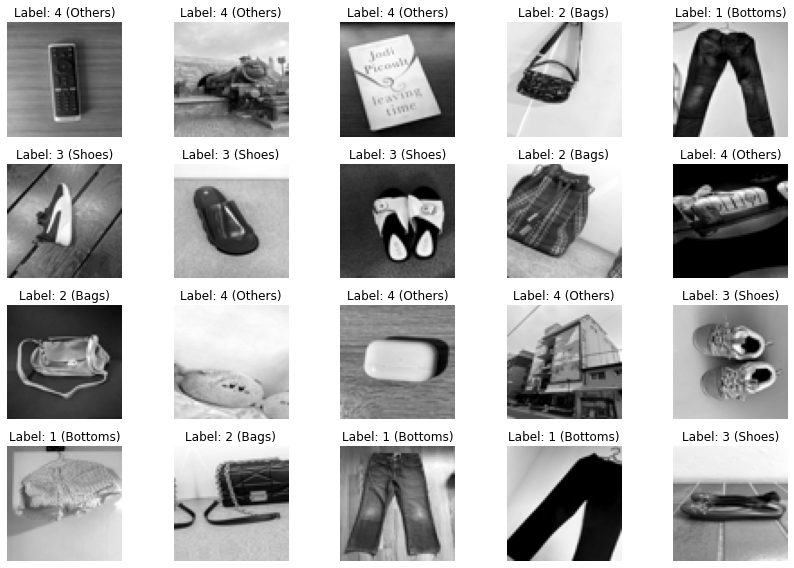

In [11]:
num_images = 20
num_rows = round(num_images / 5)
num_cols = num_images // num_rows

labels_dict = {0: "tops", 1: "bottoms", 2: "bags", 3: "shoes", 4: "others"}

# Get random indices to select images
random_indices = np.random.choice(len(X_train), num_images, replace=False)

# Visualize the images
plt.figure(figsize=(12, 8), facecolor="white")
for i, idx in enumerate(random_indices):
    # Reshape the flattened pixel values back to the original image shape
    image = X_train[idx].reshape(r1, r2)
    label = y_train[idx]
    
    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label} ({labels_dict[label].capitalize()})')
    plt.axis('off')

plt.tight_layout()
plt.show()

Visualising Preprocessed Data (X_train_PCA)

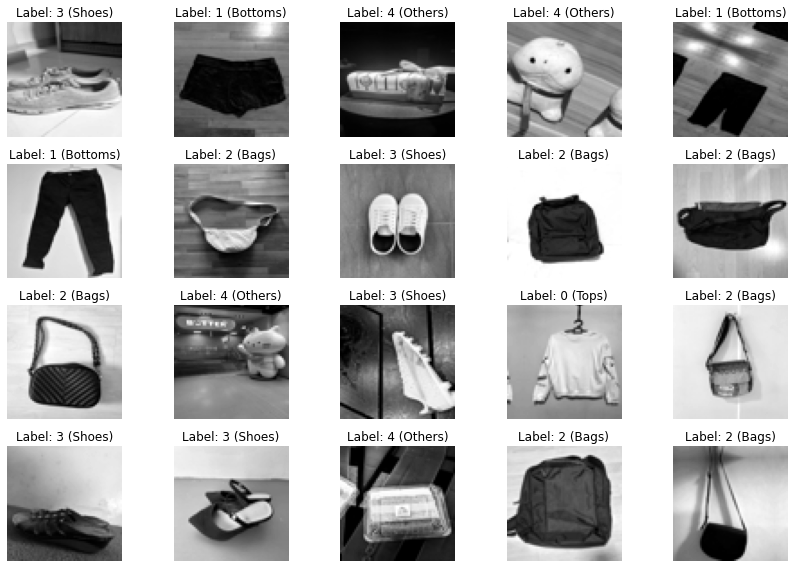

In [12]:
num_images = 20
num_rows = round(num_images / 5)
num_cols = num_images // num_rows

labels_dict = {0: "tops", 1: "bottoms", 2: "bags", 3: "shoes", 4: "others"}

# Get random indices to select images
random_indices = np.random.choice(len(X_train_PCA), num_images, replace=False)

# Visualize the images
plt.figure(figsize=(12, 8), facecolor="white")
for i, idx in enumerate(random_indices):
    # Reshape the flattened pixel values back to the original image shape
    image = X_train[idx].reshape(r1, r2)
    label = y_train[idx]
    
    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label} ({labels_dict[label].capitalize()})')
    plt.axis('off')

plt.tight_layout()
plt.show()